In [4]:
import pandas as pd

# Loading Data

In [5]:
raw_data = pd.read_csv("car_ad.csv", encoding='latin1')
raw_data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [6]:
raw_data.describe(include='all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


# Handling Missing Values

In [7]:
data = raw_data.copy()
data.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

In [8]:
#Eliminate Rows
data_no_missing_values = data.dropna(subset = ['engV', 'drive'])
data_no_missing_values.describe(include='all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,8739,8739.000000,8739,8739.000000,8739.000000,8739,8739,8739.000000,8739,8739
unique,83,NaN,6,NaN,NaN,4,2,NaN,852,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,860,NaN,3321,NaN,NaN,4065,8236,NaN,182,4973
mean,NaN,15733.542261,NaN,140.095434,2.588607,NaN,NaN,2006.609681,NaN,NaN
std,NaN,24252.904810,NaN,97.892213,5.416670,NaN,NaN,6.968947,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1959.000000,NaN,NaN
25%,NaN,5000.000000,NaN,71.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9250.000000,NaN,130.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16800.000000,NaN,195.500000,2.500000,NaN,NaN,2012.000000,NaN,NaN


In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
imputer = imputer.fit(data[['price']])

# Transform the data and replace missing values with the mean
data_no_missing_values[['price']]
sample = imputer.transform(data_no_missing_values[['price']])
print(sample)

[[15500.]
 [20500.]
 [35000.]
 ...
 [18500.]
 [16999.]
 [22500.]]


In [10]:
data_no_missing_values.loc[:,['price']] = imputer.transform(data_no_missing_values[['price']])

C:\Users\ceedj\AppData\Local\Temp\ipykernel_9600\2520656358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_missing_values.loc[:,['price']] = imputer.transform(data_no_missing_values[['price']])


In [11]:
data_no_missing_values.describe(include='all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,8739,8739.000000,8739,8739.000000,8739.000000,8739,8739,8739.000000,8739,8739
unique,83,NaN,6,NaN,NaN,4,2,NaN,852,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,860,NaN,3321,NaN,NaN,4065,8236,NaN,182,4973
mean,NaN,15733.542261,NaN,140.095434,2.588607,NaN,NaN,2006.609681,NaN,NaN
std,NaN,24252.904810,NaN,97.892213,5.416670,NaN,NaN,6.968947,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1959.000000,NaN,NaN
25%,NaN,5000.000000,NaN,71.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9250.000000,NaN,130.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16800.000000,NaN,195.500000,2.500000,NaN,NaN,2012.000000,NaN,NaN


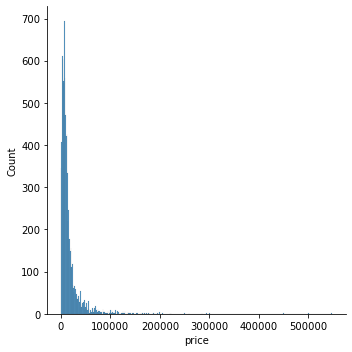

In [12]:
import seaborn as sns

# Visualize the distribution of 'price' column
sns.displot(data_no_missing_values['price'])

In [13]:
q = data_no_missing_values['price'].quantile(0.99685)
q1 = data_no_missing_values['price'].quantile(0.00135)
data_without_outliers_t = data_no_missing_values[data_no_missing_values['price']<q]
data_without_outliers = data_without_outliers_t[data_without_outliers_t['price']>q1]

data_without_outliers.describe(include='all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,8467,8467.000000,8467,8467.000000,8467.000000,8467,8467,8467.000000,8467,8467
unique,83,NaN,6,NaN,NaN,4,2,NaN,842,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,836,NaN,3263,NaN,NaN,3963,7971,NaN,178,4899
mean,NaN,15371.291582,NaN,142.189323,2.558884,NaN,NaN,2006.473013,NaN,NaN
std,NaN,19054.335071,NaN,97.314180,5.393475,NaN,NaN,6.919644,NaN,NaN
min,NaN,259.350000,NaN,0.000000,0.100000,NaN,NaN,1959.000000,NaN,NaN
25%,NaN,5432.000000,NaN,75.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9500.000000,NaN,130.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,17000.000000,NaN,197.000000,2.500000,NaN,NaN,2011.000000,NaN,NaN


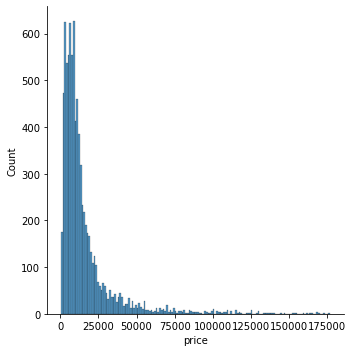

In [14]:
sns.displot(data_without_outliers[ 'price'])

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

variables = data_without_outliers[['price','mileage','year']]
vif = pd.DataFrame()
df = add_constant(variables)

vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif['features'] = df.columns

vif

,VIF,features
0,126412.361289,const
1,1.308529,price
2,1.384646,mileage
3,1.500005,year


In [16]:
data_dummies = pd.get_dummies(data_without_outliers)
data_dummies

,price,mileage,engV,year,car_Acura,car_Alfa Romeo,car_Aro,car_Aston Martin,car_Audi,car_BMW,...,model_i10,model_i20,model_i30,model_ix55 (Veracruz),model_Ïàòðèîò,model_Ïðèîðà,model_Òàâðèÿ-Íîâà,drive_front,drive_full,drive_rear
0,15500.0,68,2.5,2010,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,20500.0,173,1.8,2011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,35000.0,135,5.5,2008,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,17800.0,162,1.8,2012,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,16600.0,83,2.0,2013,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9571,14500.0,140,2.0,2011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9572,2200.0,150,1.6,1986,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9573,18500.0,180,3.5,2008,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9574,16999.0,150,3.5,2008,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Standardization

In [17]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
data_scaled = data_dummies.copy()
data_scaled = data_dummies = std.fit_transform(data_dummies)
data_scaled = std.transform(data_dummies)

data_scaled

C:\Users\ceedj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.80675566, -1.46905806, -0.47649317, ..., -3.54480521,
         3.11198172, -1.60405762],
       [-0.80674188, -1.45796916, -0.50055961, ..., -3.54480521,
        -1.97435889,  6.13432942],
       [-0.80670194, -1.46198229, -0.37335124, ..., -3.54480521,
        -1.97435889,  6.13432942],
       ...,
       [-0.80674739, -1.4572299 , -0.44211252, ..., -3.54480521,
         3.11198172, -1.60405762],
       [-0.80675153, -1.46039816, -0.44211252, ...,  0.55654481,
        -1.97435889, -1.60405762],
       [-0.80673638, -1.46874123, -0.43867446, ..., -3.54480521,
         3.11198172, -1.60405762]])

# Data Analysis

In [18]:
import matplotlib.pyplot as plt

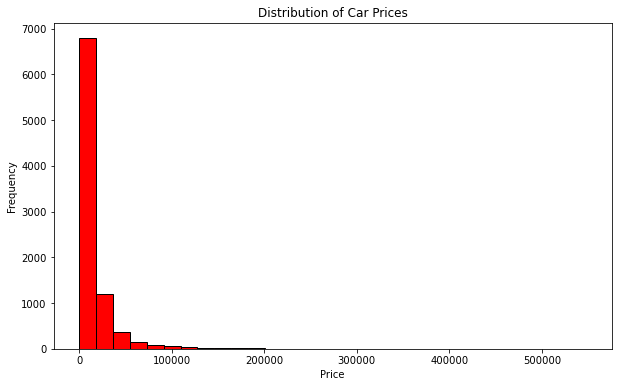

In [22]:
# Histogram for Price
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data_no_missing_values['price'], bins=30, color='red', edgecolor='black')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

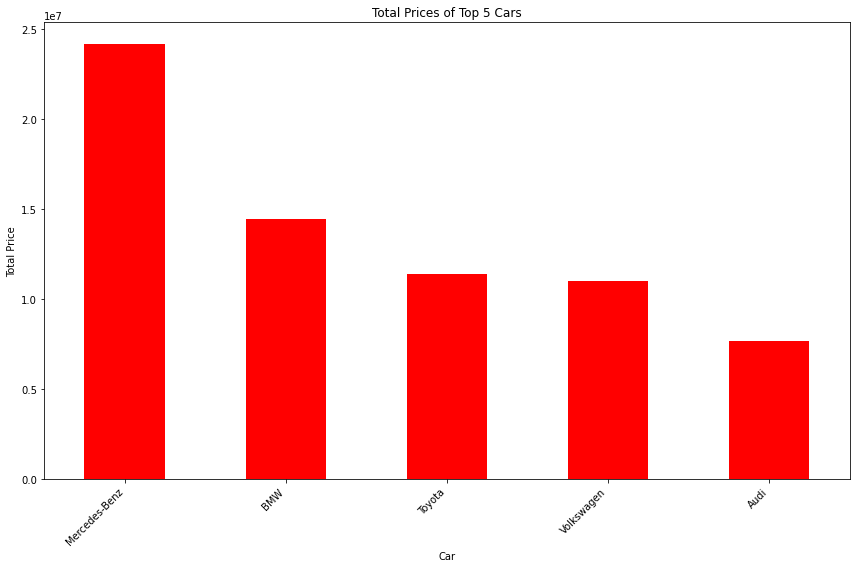

Top 5 cars with the highest total prices:
car
Mercedes-Benz    2.417029e+07
BMW              1.447193e+07
Toyota           1.140171e+07
Volkswagen       1.099188e+07
Audi             7.702301e+06
Name: price, dtype: float64


In [24]:
# Grouping by car and summing prices
car_prices_sum = data_no_missing_values.groupby('car')['price'].sum().sort_values(ascending=False)

# Selecting the top 5 cars
top_5_cars = car_prices_sum.head(5)

# Plotting the results
plt.figure(figsize=(12, 8))
top_5_cars.plot(kind='bar', color='red')
plt.title('Total Prices of Top 5 Cars')
plt.xlabel('Car')
plt.ylabel('Total Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Displaying the top car with the highest total price
print("Top 5 cars with the highest total prices:")
print(top_5_cars)

In [26]:
import pandas as pd

# Filter data for Mercedes-Benz and BMW
mercedes_bmw_data = data_no_missing_values[(data_no_missing_values['car'] == 'Mercedes-Benz') | (data_no_missing_values['car'] == 'BMW')]

avg_price_mercedes = mercedes_bmw_data[mercedes_bmw_data['car'] == 'Mercedes-Benz']['price'].mean()
avg_price_bmw = mercedes_bmw_data[mercedes_bmw_data['car'] == 'BMW']['price'].mean()

print(f"Average price for Mercedes-Benz: ${avg_price_mercedes:.2f}")
print(f"Average price for BMW: ${avg_price_bmw:.2f}")

Average price for Mercedes-Benz: $28808.46
Average price for BMW: $22790.44


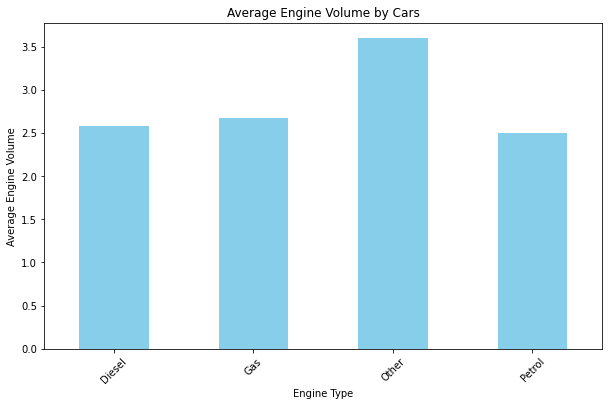

In [25]:
# Grouping data by Engine Type and calculating the mean Engine Volume for each Engine Type
engine_volume_by_type = data_no_missing_values.groupby('engType')['engV'].mean()

plt.figure(figsize=(10, 6))
engine_volume_by_type.plot(kind='bar', color='skyblue')
plt.title('Average Engine Volume by Cars')
plt.xlabel('Engine Type')
plt.ylabel('Average Engine Volume')
plt.xticks(rotation=45)
plt.show()

Based on the given data, most of the cars used the "Other" meaning they have used other engine types other than diesel, gas, and petrol. 

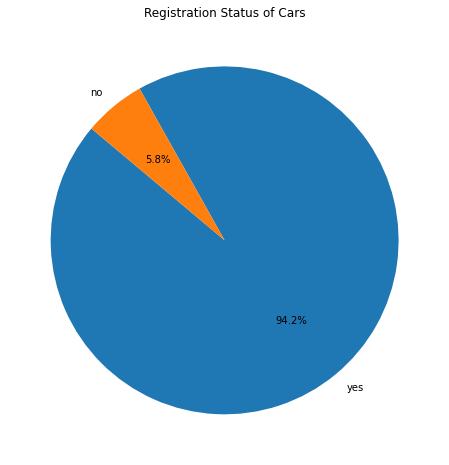

In [27]:
# Pie chart for Registration Status
plt.figure(figsize=(8,8))
registration_counts = data_no_missing_values['registration'].value_counts()
plt.pie(registration_counts, labels=registration_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Registration Status of Cars')
plt.show()

In [ ]:
As the overall general results, majority of the cars were registered. 

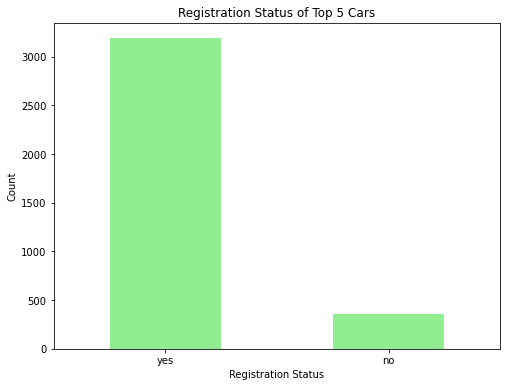

In [52]:
# Grouping data by Registration Status and calculating the count for each status for top 5 cars
registration_status_counts = top_5_data['registration'].value_counts()

# Plotting bar graph for Registration Status for top 5 cars
plt.figure(figsize=(8, 6))
registration_status_counts.plot(kind='bar', color='lightgreen')
plt.title('Registration Status of Top 5 Cars')
plt.xlabel('Registration Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


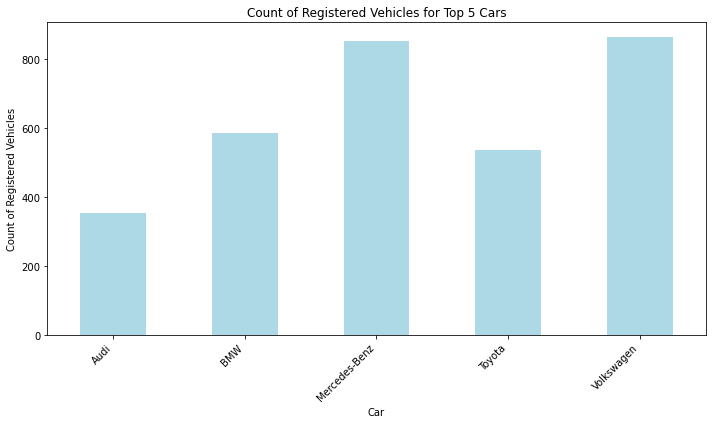

In [55]:
# Calculating total count of registered vehicles for each car
registration_counts_by_car['Total Registered'] = registration_counts_by_car['yes']

# Plotting bar graph for count of registered vehicles for each car among the top 5
plt.figure(figsize=(10, 6))
registration_counts_by_car['Total Registered'].plot(kind='bar', color='lightblue')
plt.title('Count of Registered Vehicles for Top 5 Cars')
plt.xlabel('Car')
plt.ylabel('Count of Registered Vehicles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


These are the top 5 cars based on their registererd vehicles. Volkswagen and Mercedes-Benz were on the top. 

In [28]:
# Extracting all unique models from the dataset
all_models = data_no_missing_values['model'].unique()

# Displaying the list of all models
print("List of all models:")
for model in all_models:
    print(model)


List of all models:
Kuga
E-Class
CL 550
B 180
X-Trail
Accord
Megane
Qashqai
750
GLE-Class
M5
Range Rover
X5
Passat B6
A6
Sebring
XF
Sprinter 324 ïàññ.
5 Series
Outlander
Juke
Galant
Sportage
Cayenne
Passat B5
Land Cruiser 200
Q7
Outlander XL
520
Vito ïàññ.
Camry
Panamera
Touareg
T5 (Transporter) ãðóç
530
Accent
Land Cruiser Prado
Vectra C
GLS 350
X6
Q5
318
Lacetti
Superb
Range Rover Sport
Passat B7
Lancer X
Range Rover Evoque
Lanos
Pajero Wagon
Octavia A5
3
Vito ãðóç.
6
LX 570
740
GS 300
S 350
A5
C-Class
Octavia A7
FX 37
GX
CL 55 AMG
IQ
A4
Forester
Ceed
Polo
2121
Civic
Aveo
Lancer
Murano
Focus
Sorento
Astra G
Macan
147
ML 500
Fortwo
Duster
LX 450
Santa FE
2114
Leaf
Caddy ïàññ.
S 320
Fiesta
Partner ïàññ.
Grand Vitara
X6 M
Trafic ïàññ.
Caddy ãðóç.
316
307
A8
Highlander
Matiz
Octavia Tour
80
Rav 4
Micra
Sequoia
X5 M
Omega
G 500
T4 (Transporter) ïàññ.
LX 470
Kangoo ãðóç.
626
Getz
Jetta
525
Touran
328
323
Legacy
528
407
Primera
IS 250
911
V 250
S 500
IX35
550
Astra H
Corolla
Mondeo
523
RX 3

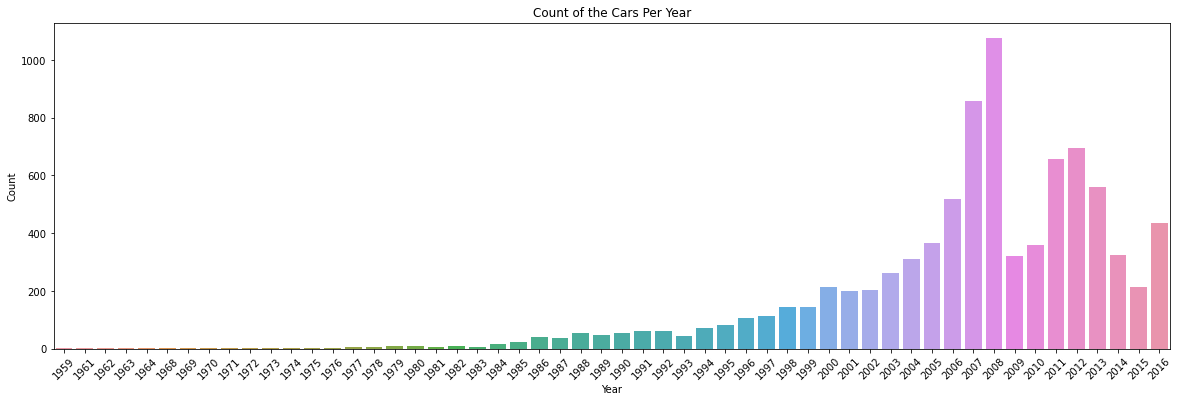

In [29]:
plt.figure(figsize=(20, 6))  # Increase the width to 12 inches
sns.countplot(x='year', data=data_no_missing_values)
plt.title('Count of the Cars Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
There has been a steady increase from the data and has peak in the year 2008. 
Followd by a significant decrease and consistent up and down from 2010 - 2016.

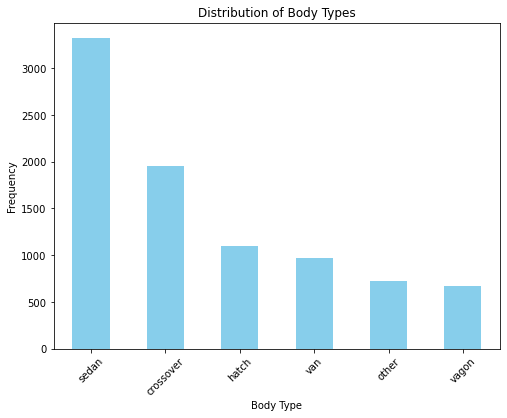

The most common body type is: sedan


In [30]:
df = pd.DataFrame(data_no_missing_values)

most_common_body_type = df['body'].mode()[0]

plt.figure(figsize=(8, 6))
df['body'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Body Types')
plt.xlabel('Body Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

print("The most common body type is:", most_common_body_type)

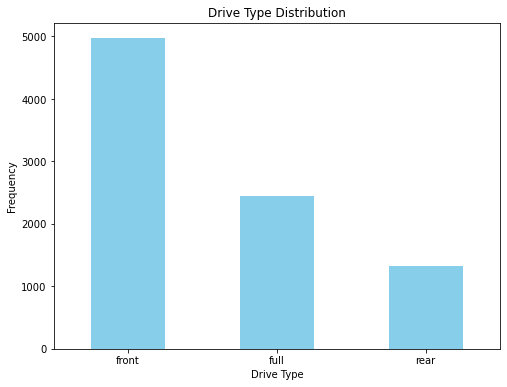

front    4973
full     2444
rear     1322
Name: drive, dtype: int64


In [31]:
df.dropna(subset=['drive'], inplace=True)

# Create a bar plot for drive type distribution
plt.figure(figsize=(8, 6))
df['drive'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Drive Type Distribution')
plt.xlabel('Drive Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Print summary statistics
print(df['drive'].value_counts())

In [ ]:
The statistics show that front-wheel drive is the most common among the automobiles observed, 
followed by full-wheel drive and rear-wheel drive. This distribution shows that front-wheel drive 
automobiles may dominate the sample. The existence of full-wheel and rear-wheel drive automobiles, 
on the other hand, implies variation in  driving dynamics and performance characteristics within the dataset, 
which might represent a variety of vehicle types and driving preferences.